In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv("D:/Learnbay ML and AI/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [35]:
#missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
#missing value analysis
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())

11


In [37]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [38]:
#univariate analysis
churn_count=df['Churn'].value_counts()
churn_pct=df['Churn'].value_counts(normalize=True) * 100
print(churn_pct.round(2))
print(churn_count)

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [39]:
#feature distribution
numerical_cols=['tenure','MonthlyCharges']
print(df[numerical_cols].describe().round(2))

        tenure  MonthlyCharges
count  7043.00         7043.00
mean     32.37           64.76
std      24.56           30.09
min       0.00           18.25
25%       9.00           35.50
50%      29.00           70.35
75%      55.00           89.85
max      72.00          118.75


In [40]:
for col in numerical_cols:
    if col in df.columns:
        data=df[col].dropna()
        mean_val=data.mean()
        std_val=data.std()
        skew_val=data.skew()
        zero_pct=(data==0).mean()* 100
        print(f'{col:} {mean_val:.2f} , {std_val:.2f} , {skew_val:.2f} , {zero_pct:.2f}')

tenure 32.37 , 24.56 , 0.24 , 0.16
MonthlyCharges 64.76 , 30.09 , -0.22 , 0.00


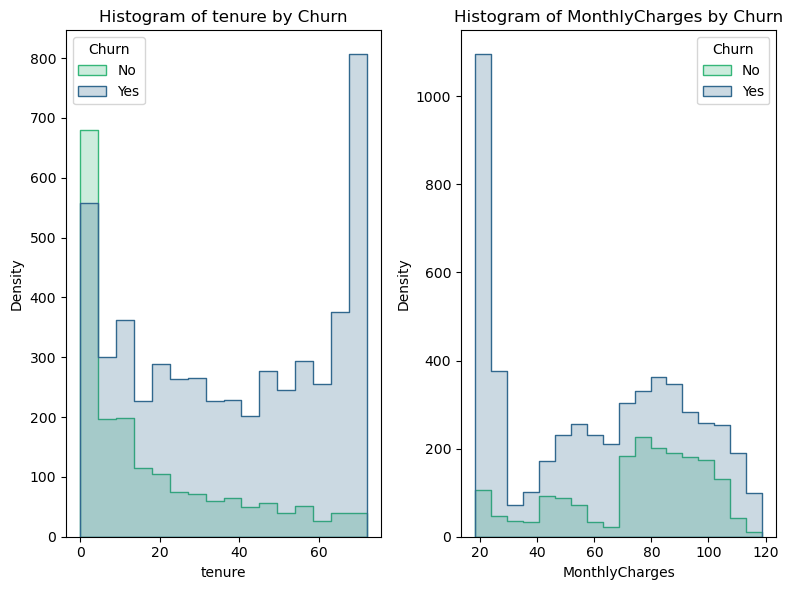

In [41]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1) # Arrange plots in a 3x2 grid
    sns.histplot(data=df, x=col, hue='Churn', element="step", palette='viridis', common_norm=False)
    plt.title(f'Histogram of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [42]:
categorical_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    if col in df.columns:
        cat_count=df[col].value_counts()
        cat_pct=df[col].value_counts(normalize=True) * 100

        print(f'\n{'Category:'} {'count'} {'Percentage'}')
        for cat in cat_count.index:
            print(f'{str(cat)} {cat_count[cat]:.2f} {cat_pct[cat]:.2f}')


Category: count Percentage
Male 3555.00 50.48
Female 3488.00 49.52

Category: count Percentage
0 5901.00 83.79
1 1142.00 16.21

Category: count Percentage
No 3641.00 51.70
Yes 3402.00 48.30

Category: count Percentage
No 4933.00 70.04
Yes 2110.00 29.96

Category: count Percentage
Yes 6361.00 90.32
No 682.00 9.68

Category: count Percentage
No 3390.00 48.13
Yes 2971.00 42.18
No phone service 682.00 9.68

Category: count Percentage
Fiber optic 3096.00 43.96
DSL 2421.00 34.37
No 1526.00 21.67

Category: count Percentage
No 3498.00 49.67
Yes 2019.00 28.67
No internet service 1526.00 21.67

Category: count Percentage
No 3088.00 43.84
Yes 2429.00 34.49
No internet service 1526.00 21.67

Category: count Percentage
No 3095.00 43.94
Yes 2422.00 34.39
No internet service 1526.00 21.67

Category: count Percentage
No 3473.00 49.31
Yes 2044.00 29.02
No internet service 1526.00 21.67

Category: count Percentage
No 2810.00 39.90
Yes 2707.00 38.44
No internet service 1526.00 21.67

Category: count Pe

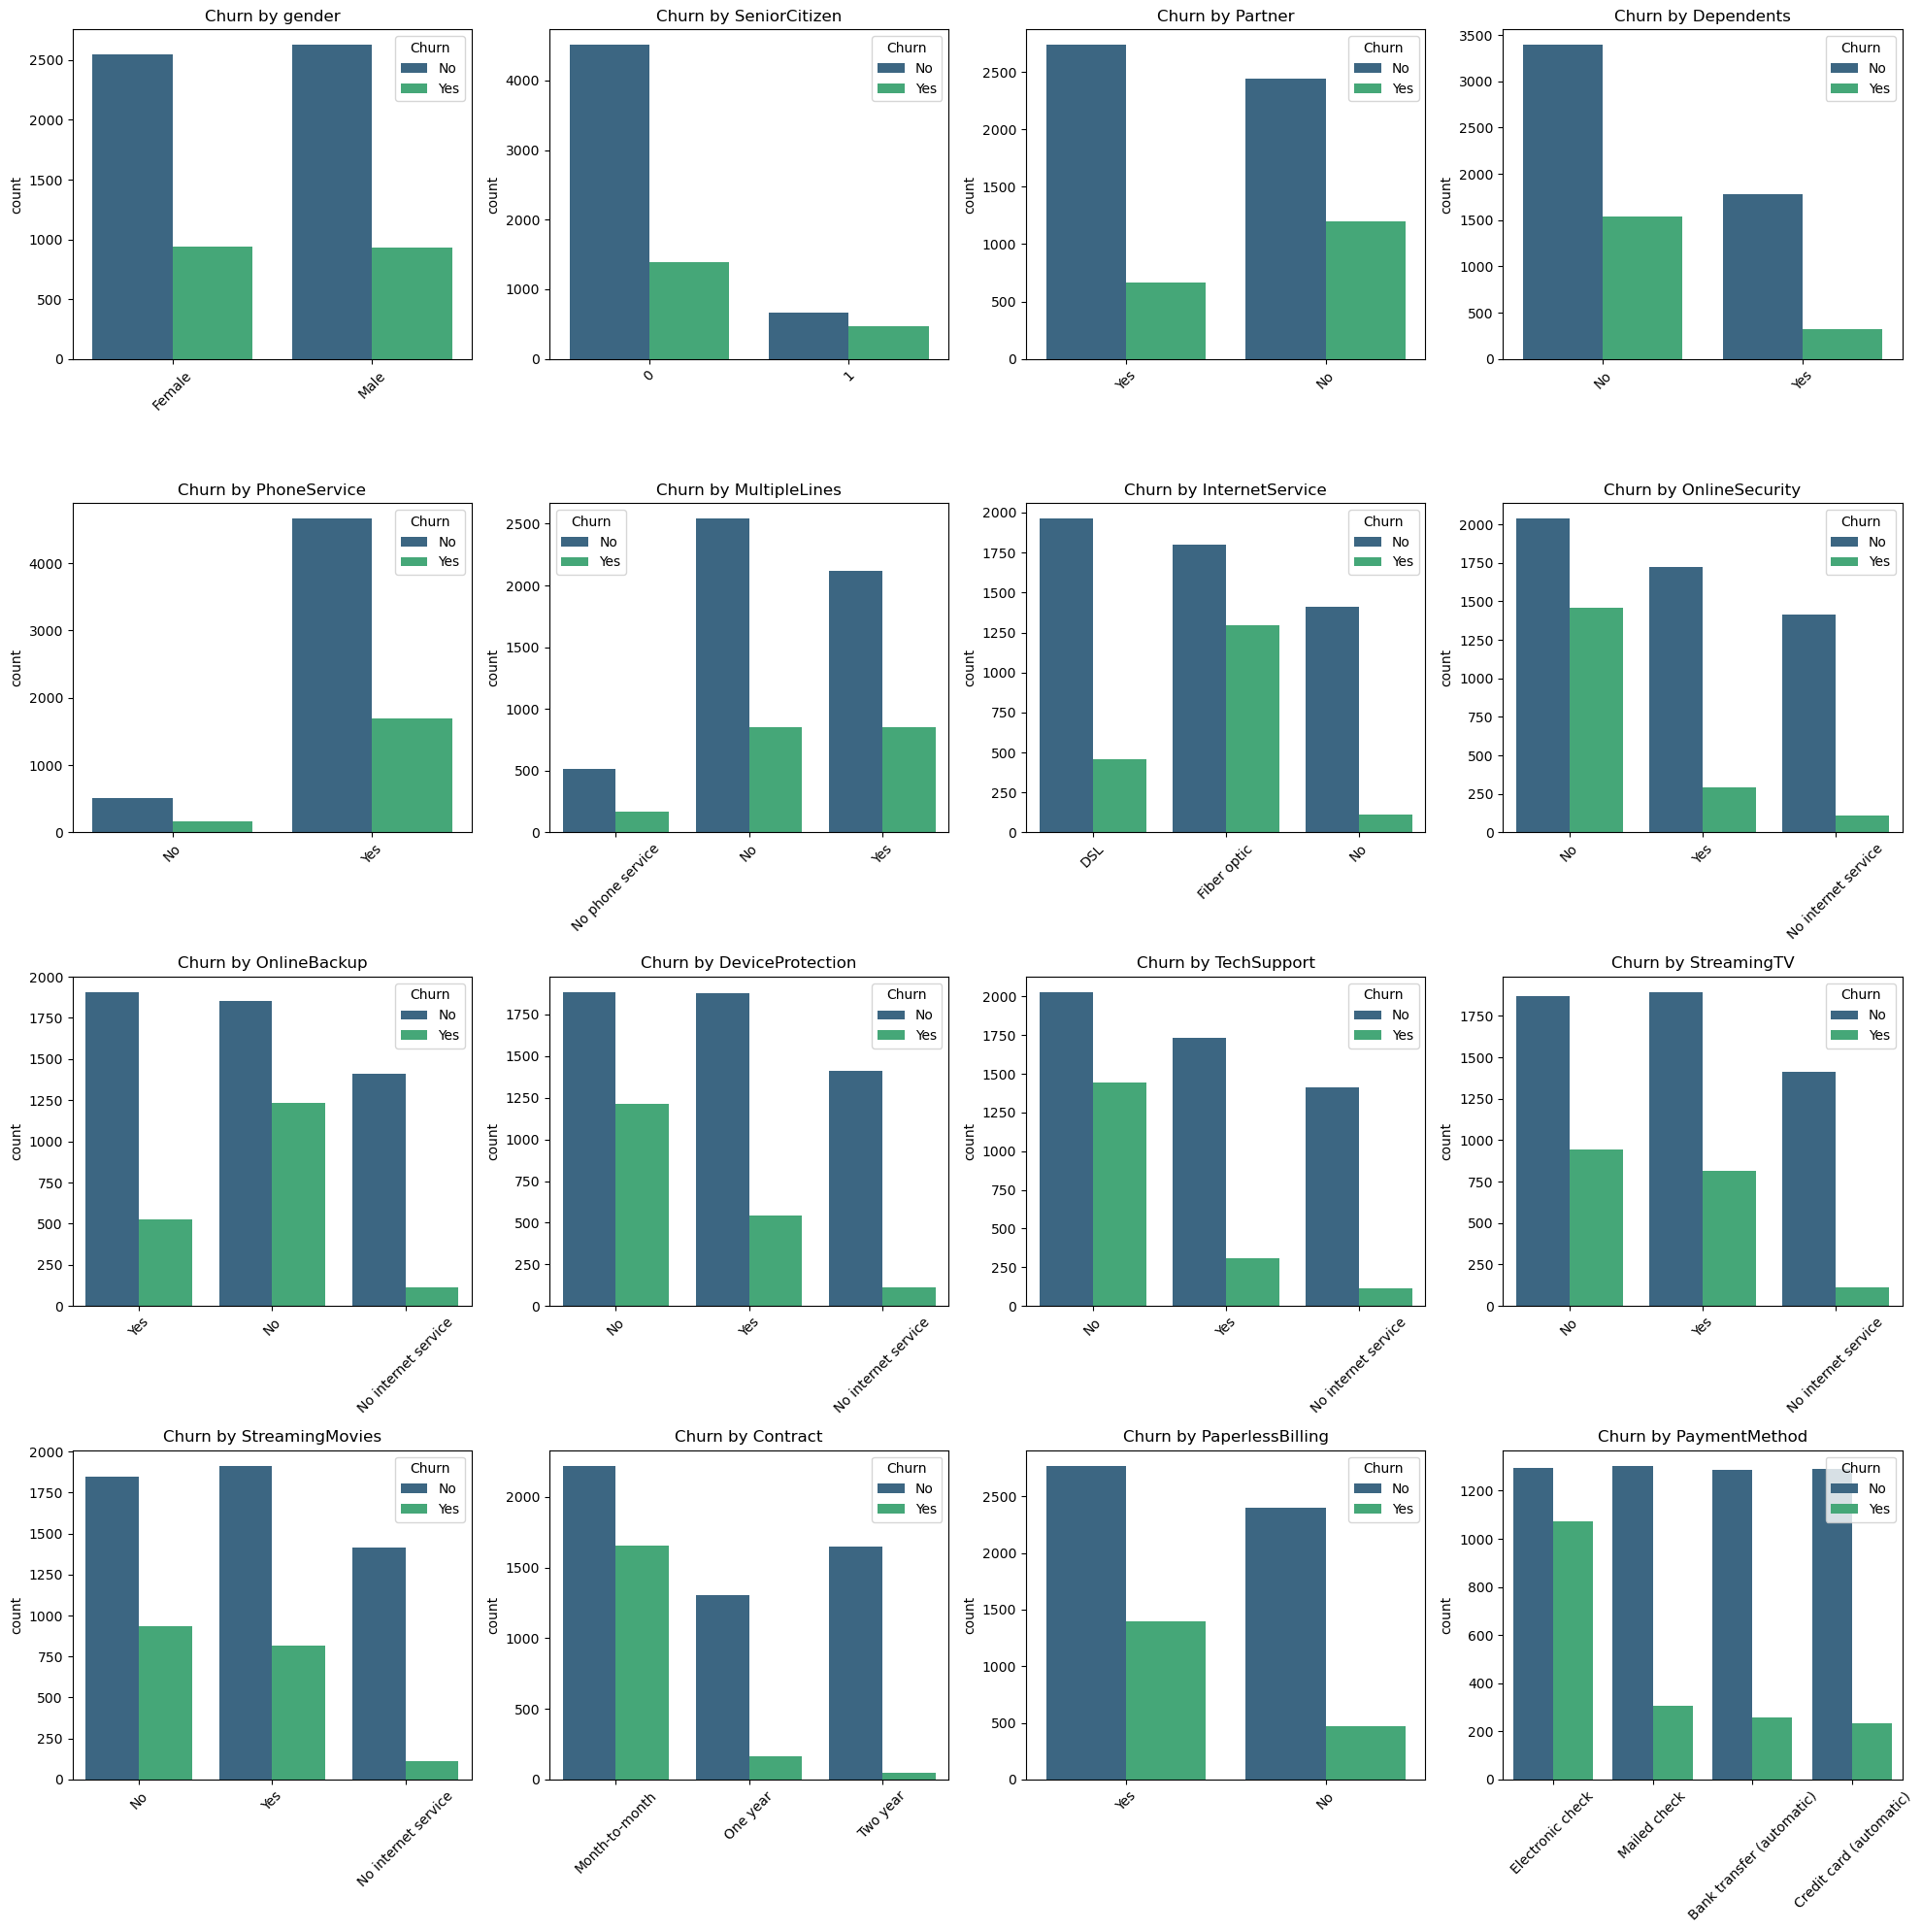

In [43]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(categorical_cols):
    plt.subplot(4, 4, i + 1)
    # countplot is best for categorical data
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45) # Rotate labels for readability
    plt.xlabel('') 

plt.tight_layout()
plt.show()

In [44]:
#feature correlation through heat maps

df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
df_corr_col= pd.get_dummies(df_corr.drop(['customerID'], axis=1))

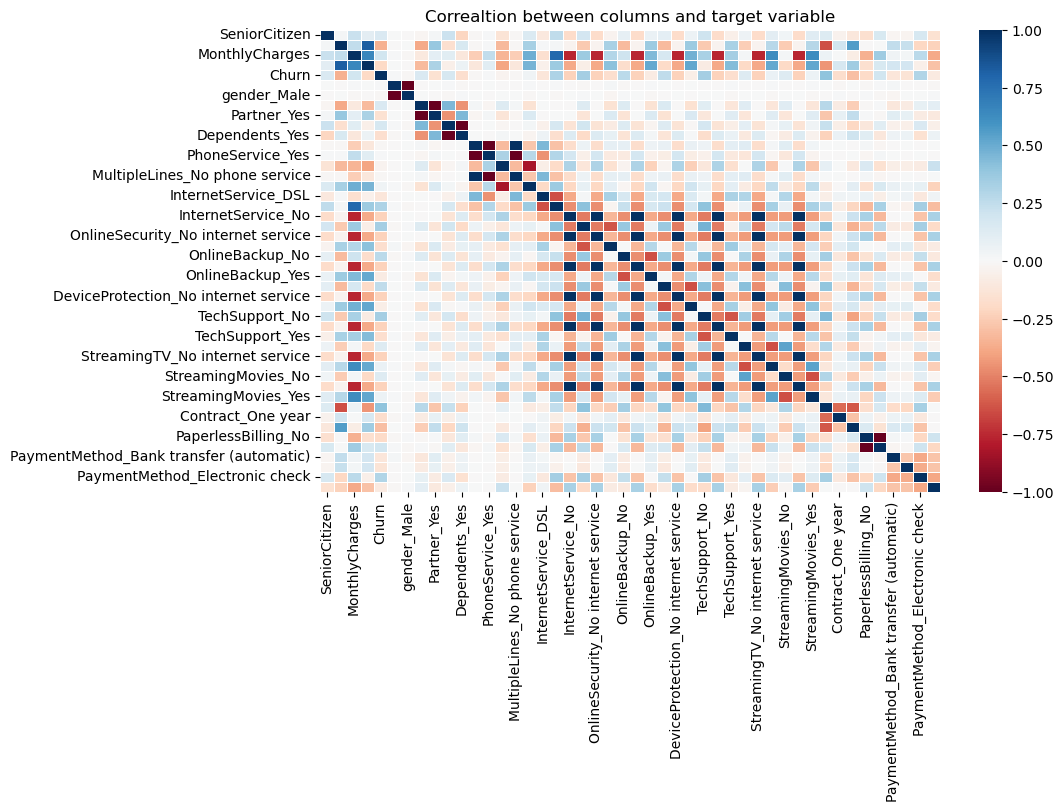

In [45]:
plt.figure(figsize=(10,6))
corr_matrix=df_corr_col.corr()

churn_matrix=corr_matrix['Churn'].sort_values(ascending=False)

sns.heatmap(corr_matrix, annot=False, cmap="RdBu",linewidth=0.5)
plt.title('Correaltion between columns and target variable')
plt.show()

In [46]:
#how does each category affect the target variable
from scipy.stats import chi2_contingency

In [47]:
for col in categorical_cols:
    if col in df.columns:
        contingency_table = pd.crosstab(df[col], df['Churn'])
        chi2, pvalue, dof, expected = chi2_contingency(contingency_table)

        print(f'\n {contingency_table}')
        if pvalue < 0.05:
            print(f'\n Highly significant {pvalue:.4f}')

        else:
            print(f'\n Not significant {pvalue:.4f}')
            
        


 Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

 Not significant 0.4866

 Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

 Highly significant 0.0000

 Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

 Highly significant 0.0000

 Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

 Highly significant 0.0000

 Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

 Not significant 0.3388

 Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

 Highly significant 0.0035

 Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113

 Highly significant 0.0000

 Churn                  No   Yes
OnlineSecurity                 
No

In [48]:
numerical_cols.append('TotalCharges')

In [49]:
#detection of outlier

for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier =  data[(data > upper_bound) | (data < lower_bound)]
        outlier_pct = len(outlier) / len(data) * 100

        max_outlier = data[(data > upper_bound)] .max()
        min_outlier =  data[(data <  lower_bound)].min()

        print(f' {col:<15} {len(outlier):<15} {outlier_pct:<15}')
        

        

        

 tenure          0               0.0            
 MonthlyCharges  0               0.0            
 TotalCharges    0               0.0            


In [60]:
#multivariate analysis

from sklearn.ensemble import IsolationForest

x_multi = df[numerical_cols].dropna()
iso_model = IsolationForest(contamination = 0.01, random_state = 42)
outlier_multi = iso_model.fit_predict(x_multi)

#here outlier == 1 means normal but if outlier == -1 is a outlier
print(f'Number of multivariate outliers detected are: {(outlier_multi == -1).sum()}') 

Number of multivariate outliers detected are: 71


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
# Dictionary of models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced', random_state = 42),
    "Extra Trees": ExtraTreesClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Results storage
results = []

for name, model in models.items():
    # Create a pipeline for each model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
   
    clf.fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)
    
   
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Churn)": recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test,y_pred)
    })

# Compare results
import pandas as pd
performance_df = pd.DataFrame(results).sort_values(by='Recall (Churn)', ascending=False)
print(performance_df)

                 Model  Accuracy  Recall (Churn)  F1 Score
0  Logistic Regression  0.750177        0.825737  0.636364
6       Neural Network  0.791341        0.549598  0.582386
4                  KNN  0.773598        0.525469  0.551336
5                  SVM  0.813343        0.517426  0.594761
3          Extra Trees  0.790632        0.471850  0.544049
2        Random Forest  0.792761        0.461126  0.540881
1        Decision Tree  0.706175        0.453083  0.449468
